# K-Nearest Neighbour (KNN) Assignment

In [36]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [37]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass (1).csv
Saving Zoo.csv to Zoo (1).csv


## 1. Glass Dataset

In [38]:
glass = pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [39]:
glass.shape

(214, 10)

In [40]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [41]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [42]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### Visualization

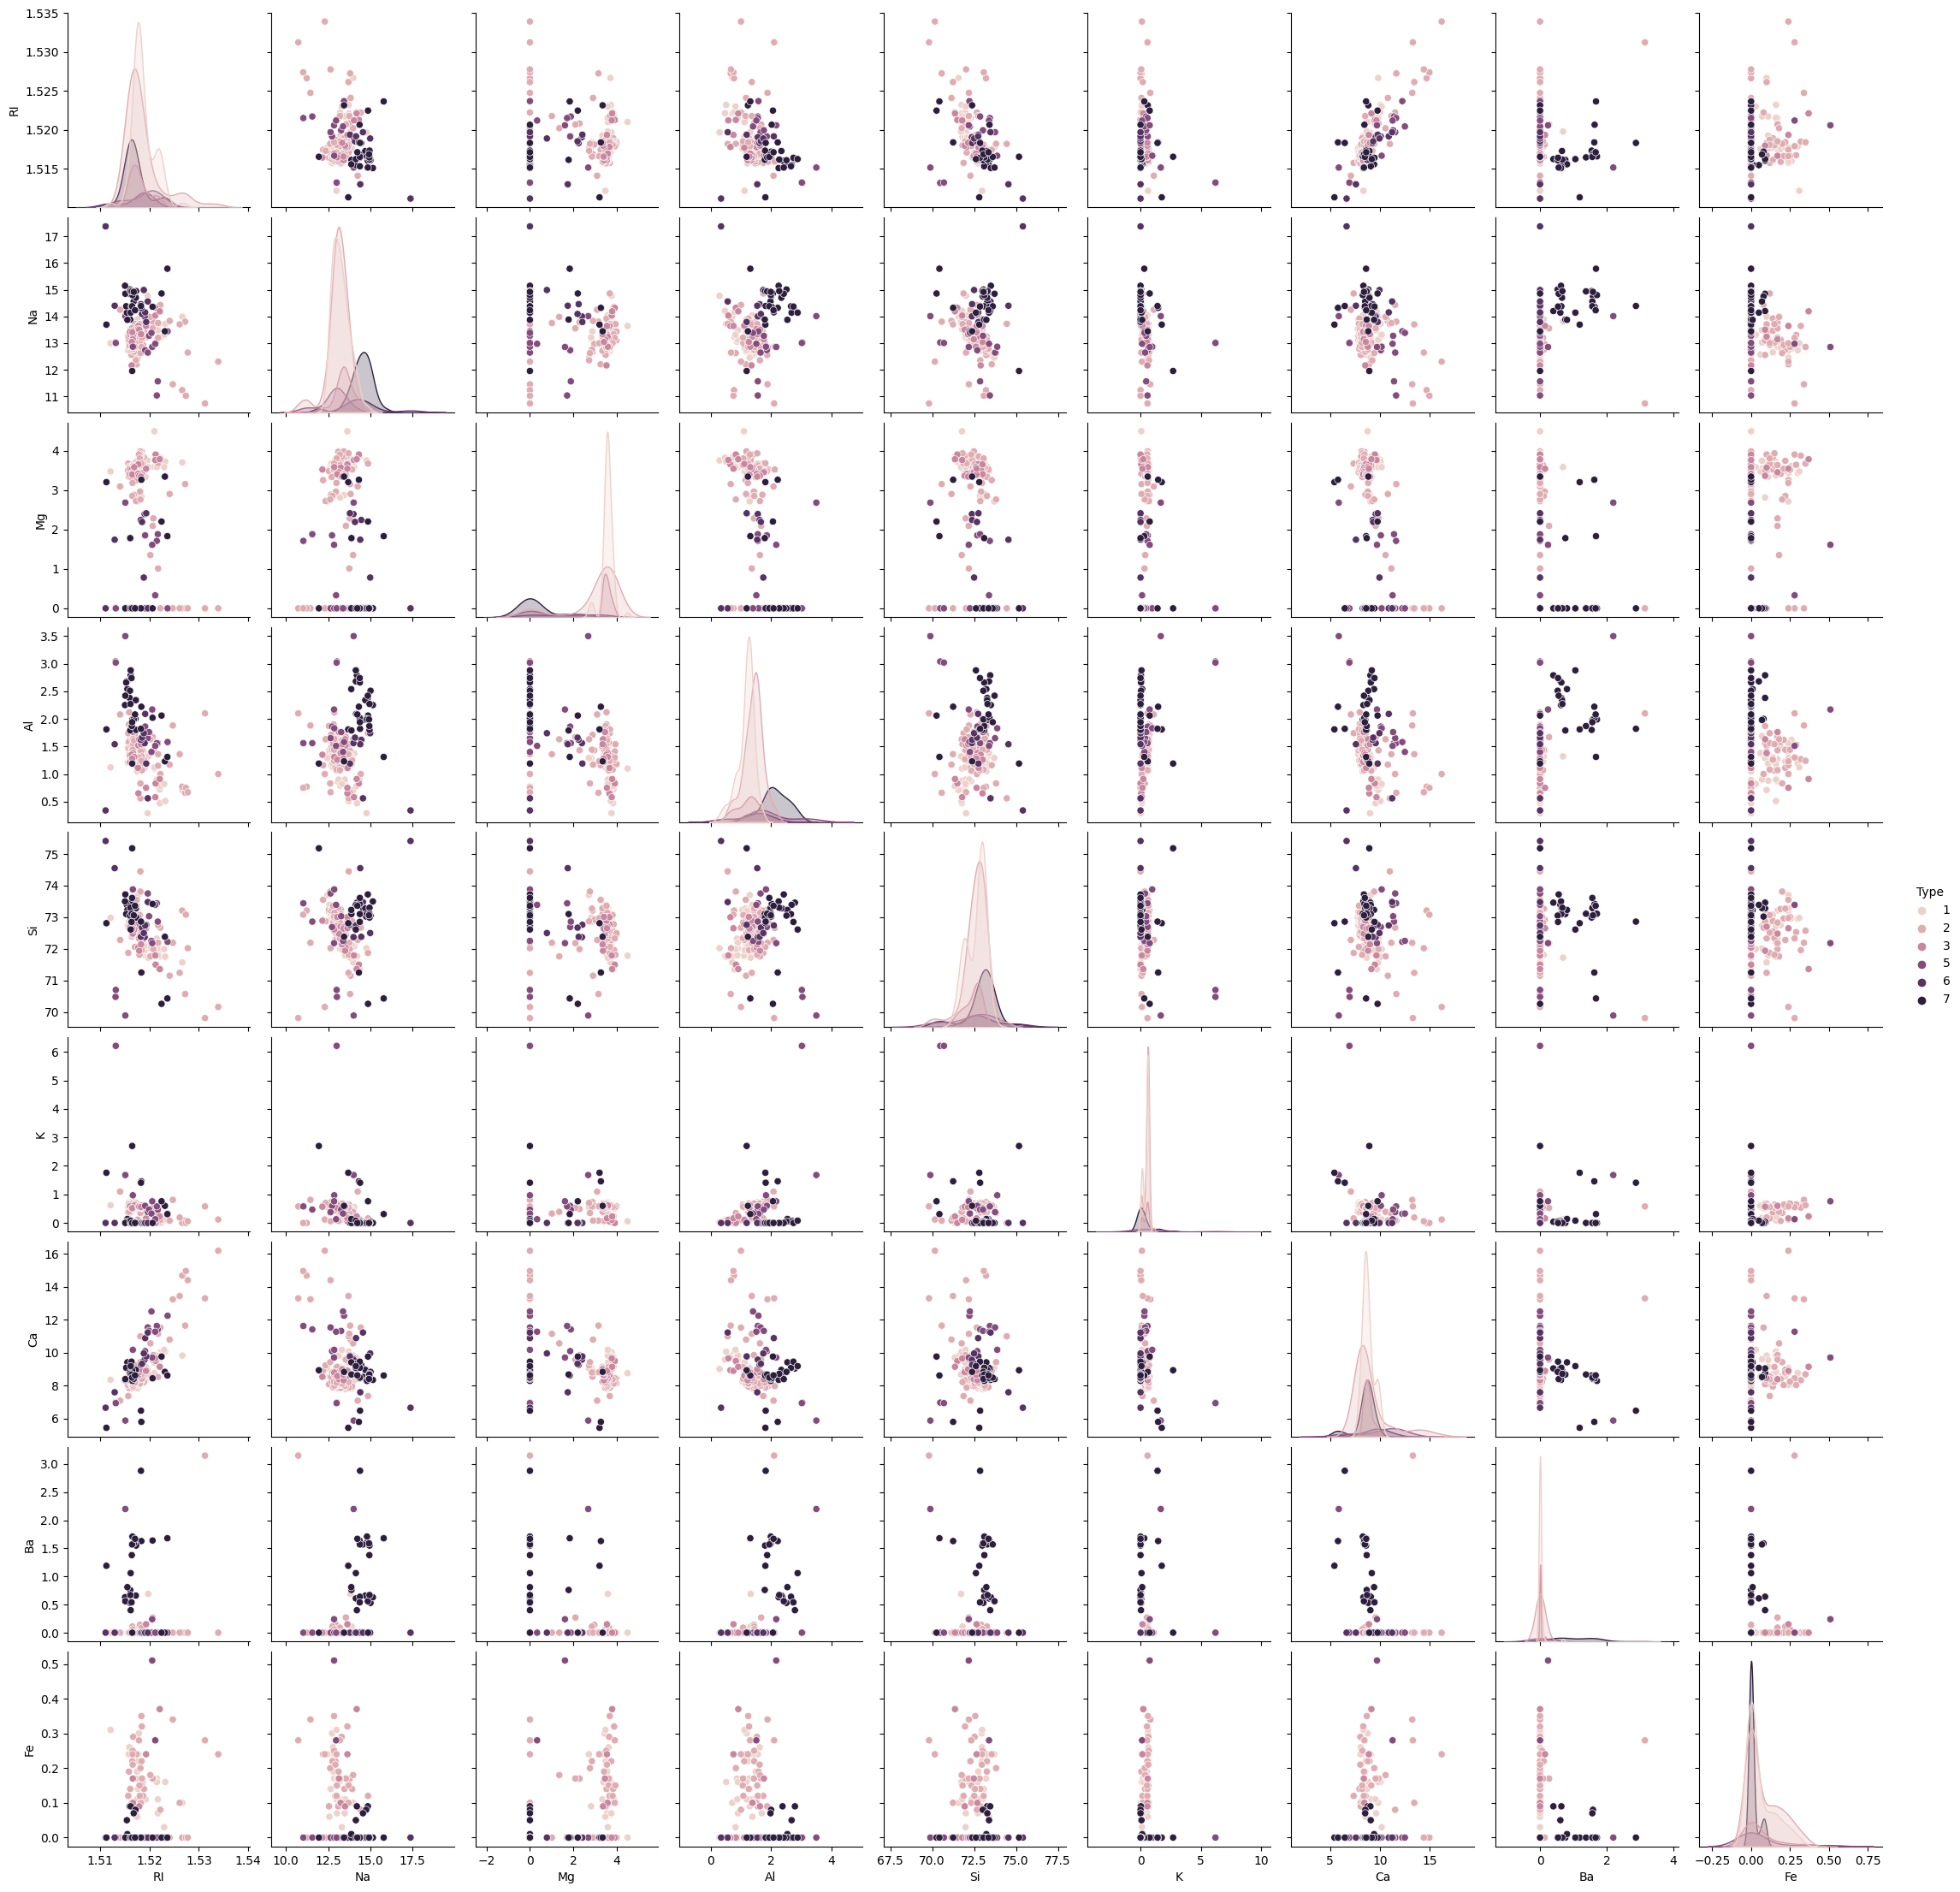

In [43]:
sns.pairplot(glass, hue='Type')

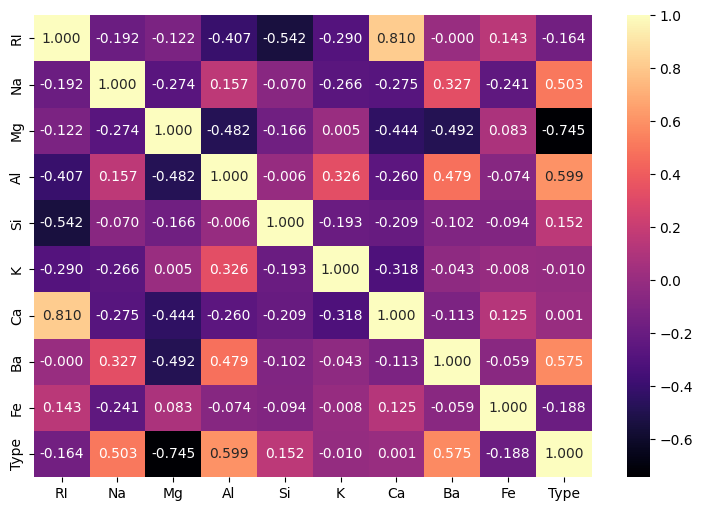

In [44]:
plt.figure(figsize = (9, 6));
sns.heatmap(glass.corr(), cmap='magma', annot=True, fmt='.3f')
plt.show()

### KNN Model Building

In [45]:
X = glass.iloc[:, 0:9]
Y = glass.iloc[:, -1]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [46]:
model = KNeighborsClassifier(n_neighbors = 12)

In [47]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=12)

In [48]:
kfold = KFold(n_splits=8)
results = cross_val_score(model, X, Y, cv = kfold)

In [49]:
results

array([0.51851852, 0.81481481, 0.88888889, 0.37037037, 0.44444444,
       0.22222222, 0.        , 0.        ])

In [50]:
results.mean()

0.4074074074074074

In [51]:
model.predict([[1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0]])

array([7])

### Grid Search for Algorithm Tuning

In [52]:
n_neighbors = list(range(1,33))
parameters = {'n_neighbors' : n_neighbors}

In [53]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [54]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


### Visualizing the CV results

In [55]:
k_range = range(1, 57)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())

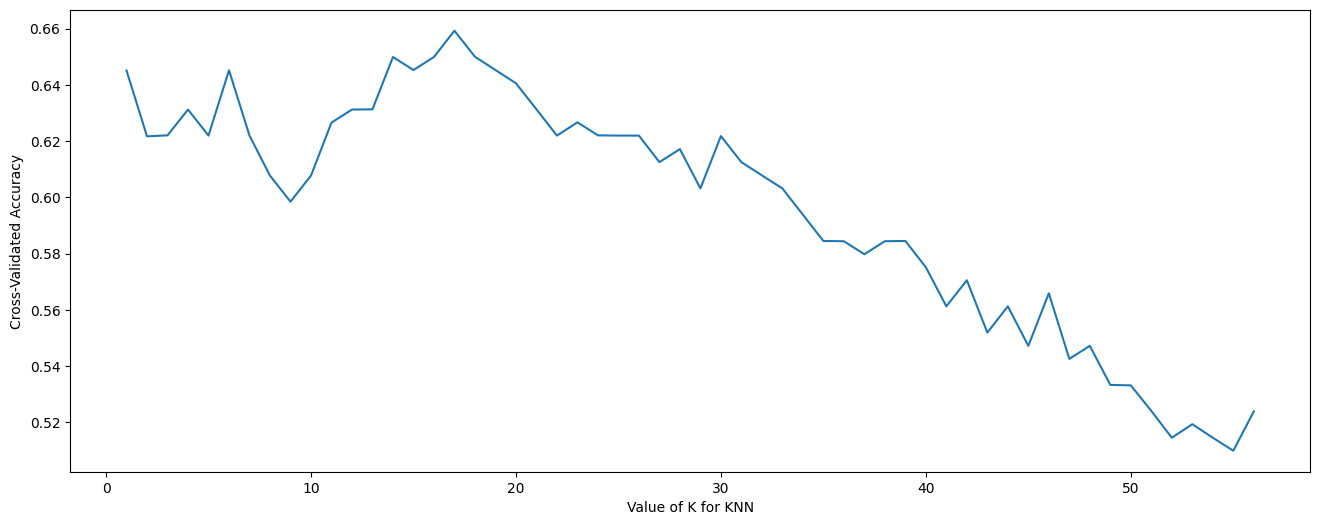

In [56]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [57]:
k_scores

[0.6450908455625437,
 0.621680642907058,
 0.6220300489168414,
 0.6312019566736548,
 0.6219426974143956,
 0.6451781970649895,
 0.6219426974143956,
 0.6077044025157233,
 0.598445143256464,
 0.6077044025157233,
 0.6265723270440252,
 0.6312019566736548,
 0.6312893081761006,
 0.649895178197065,
 0.6452655485674353,
 0.649895178197065,
 0.6592417889587701,
 0.6499825296995109,
 0.6452655485674353,
 0.6405485674353598,
 0.6312893081761005,
 0.6219426974143956,
 0.626659678546471,
 0.6220300489168414,
 0.6219426974143955,
 0.6219426974143955,
 0.6125087351502445,
 0.6171383647798742,
 0.6031621243885396,
 0.6217679944095038,
 0.6125087351502446,
 0.6077917540181691,
 0.6031621243885394,
 0.5938155136268344,
 0.5844689028651292,
 0.5843815513626834,
 0.5797519217330538,
 0.5843815513626834,
 0.5844689028651292,
 0.5751222921034241,
 0.5612334032145353,
 0.5704926624737945,
 0.5518867924528302,
 0.5612334032145353,
 0.5471698113207547,
 0.565863032844165,
 0.5425401816911251,
 0.5471698113207547

In [58]:
glass_accuracy = pd.DataFrame({'Value of k' : range(1,57),
                            'Accuracy' : k_scores})
glass_accuracy

,Value of k,Accuracy
0,1,0.645091
1,2,0.621681
2,3,0.622030
3,4,0.631202
4,5,0.621943
5,6,0.645178
6,7,0.621943
7,8,0.607704
8,9,0.598445
9,10,0.607704


In [59]:
glass_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
16,17,0.659242
17,18,0.649983
15,16,0.649895
13,14,0.649895
18,19,0.645266
14,15,0.645266
5,6,0.645178
0,1,0.645091
19,20,0.640549
12,13,0.631289


## 2. Zoo Dataset

In [60]:
zoo = pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [61]:
zoo.shape

(101, 18)

In [62]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [63]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [64]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [65]:
zoo['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [66]:
zu=zoo['animal name'].astype('category')
zu.unique

<bound method Series.unique of 0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: category
Categories (100, object): ['aardvark', 'antelope', 'bass', 'bear', ..., 'wasp', 'wolf', 'worm', 'wren']>

### Visualization

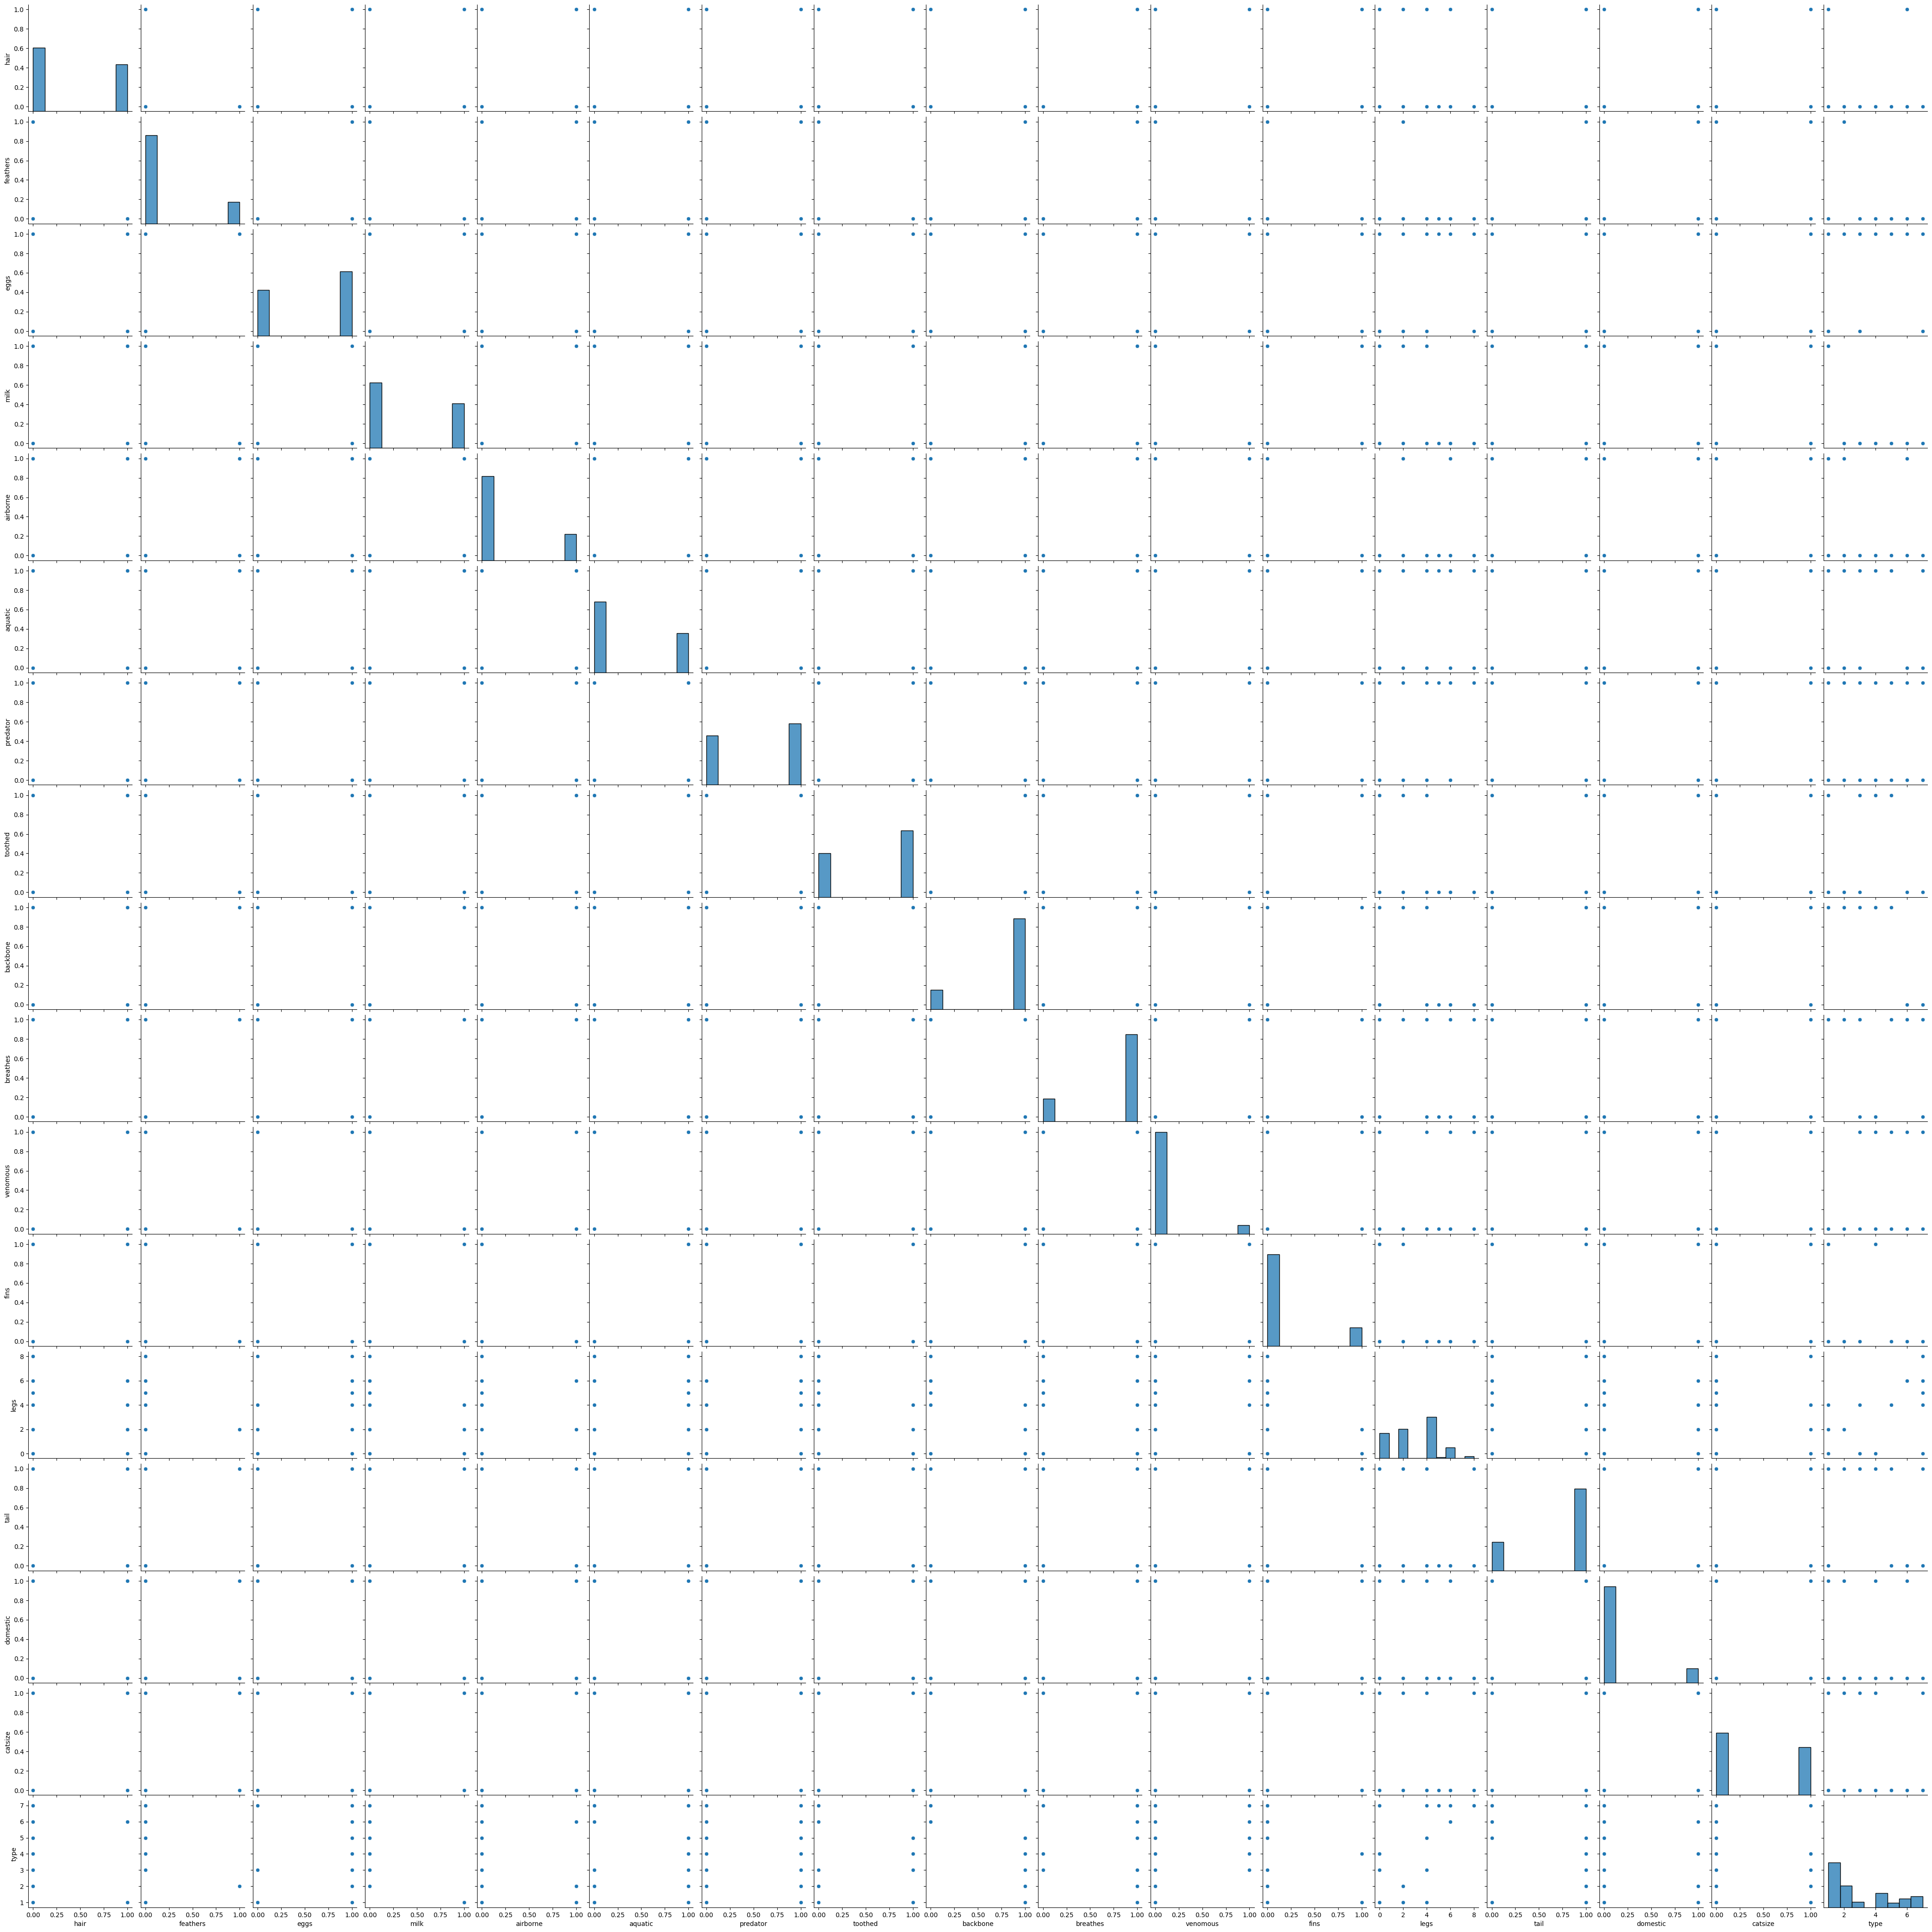

In [67]:
sns.pairplot(zoo)

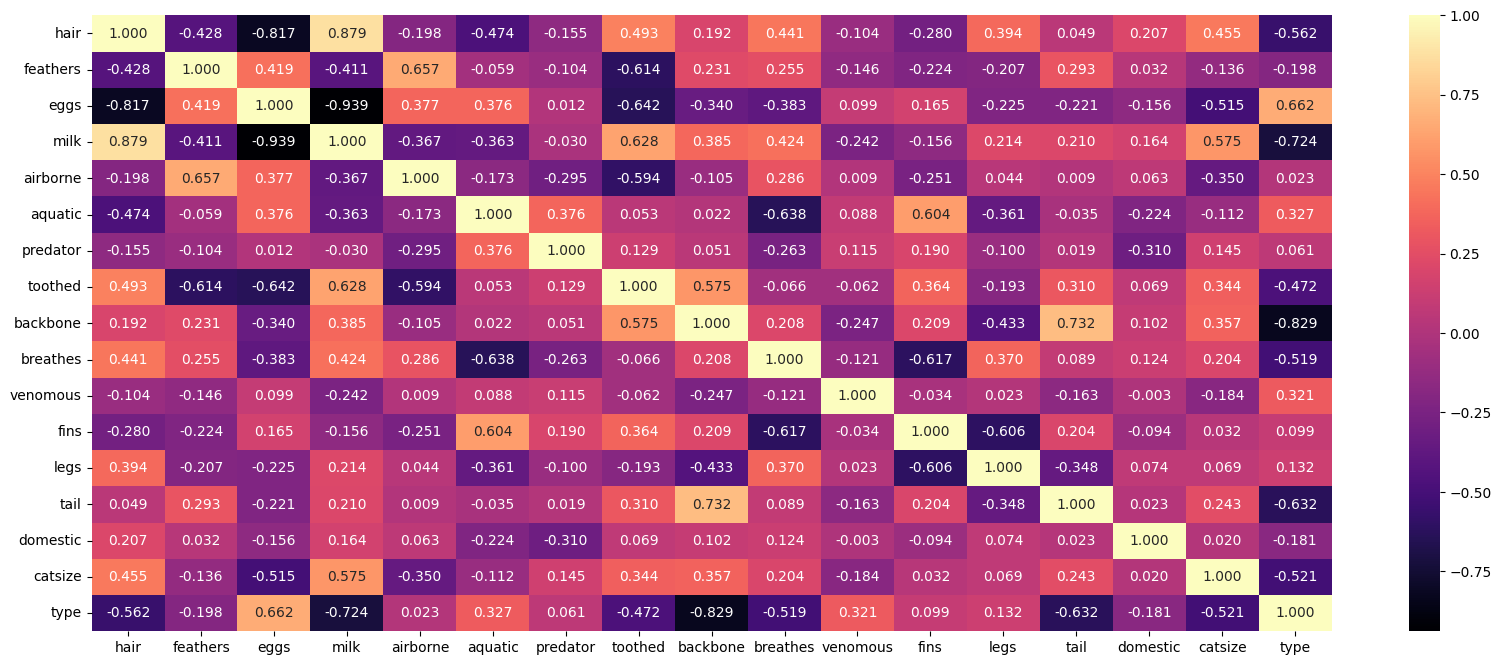

In [68]:
plt.figure(figsize = (20, 8));
sns.heatmap(zoo.corr(),cmap='magma', annot=True, fmt='.3f')
plt.show()

### KNN Model Building

In [69]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#zoo['animal name']= label_encoder.fit_transform(zoo['animal name']) 

In [70]:
X = zoo.iloc[:, 1:17]
Y = zoo.iloc[:, -1]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [71]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [72]:
model2 = KNeighborsClassifier(n_neighbors = 17)

In [73]:
model2.fit(X,Y)

KNeighborsClassifier(n_neighbors=17)

In [74]:
kfold2 = KFold(n_splits=12)
results2 = cross_val_score(model2, X, Y, cv = kfold2)

In [75]:
results2

array([1.        , 0.66666667, 0.66666667, 1.        , 0.66666667,
       0.75      , 0.875     , 0.75      , 0.625     , 0.625     ,
       0.5       , 0.875     ])

In [76]:
results2.mean()

0.75

##### Grid Search for Algorithm Tuning

In [77]:
n_neighbors2 = list(range(1,40))
parameters2 = {'n_neighbors' : n_neighbors2}

In [78]:
model2 = KNeighborsClassifier()
grid2 = GridSearchCV(estimator = model2, param_grid = parameters2)
grid2.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [79]:
print(grid2.best_score_)
print(grid2.best_params_)

0.97
{'n_neighbors': 1}


### Visualizing the CV results

In [80]:
k_range = range(1,35)
k_scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())

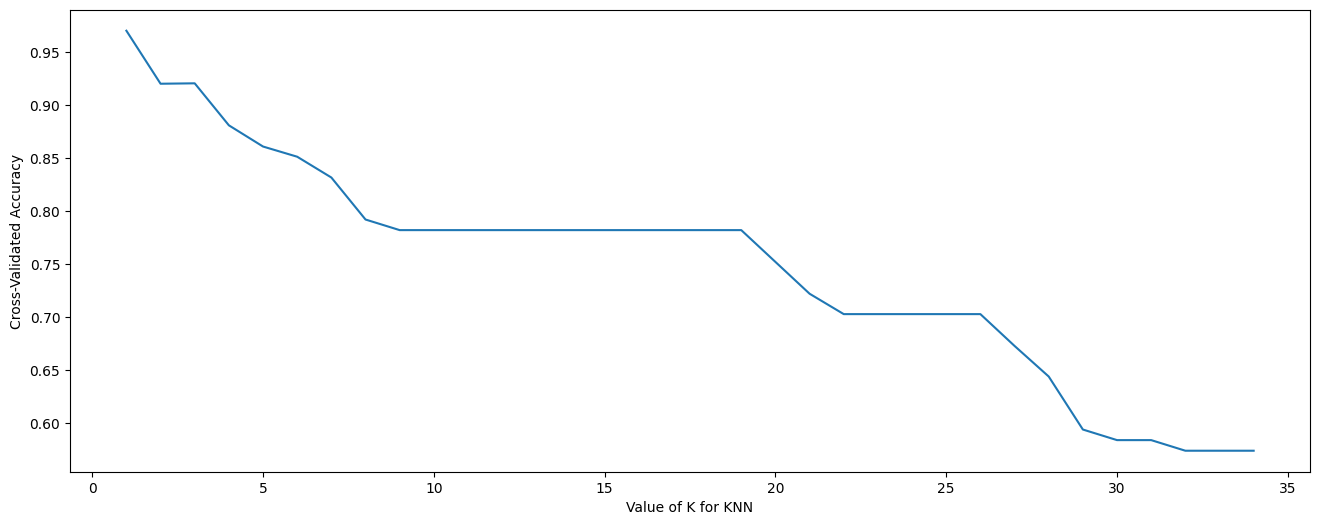

In [81]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [82]:
k_scores

[0.9703846153846154,
 0.9203846153846154,
 0.9207692307692308,
 0.8811538461538461,
 0.861153846153846,
 0.8515384615384615,
 0.831923076923077,
 0.7923076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7523076923076923,
 0.7223076923076924,
 0.7030769230769232,
 0.7030769230769232,
 0.7030769230769232,
 0.7030769230769232,
 0.7030769230769232,
 0.6730769230769231,
 0.6442307692307693,
 0.5942307692307692,
 0.5842307692307692,
 0.5842307692307692,
 0.5742307692307692,
 0.5742307692307692,
 0.5742307692307692]

In [83]:
zoo_accuracy = pd.DataFrame({'Value of k' : range(1,35),
                            'Accuracy' : k_scores})
zoo_accuracy

,Value of k,Accuracy
0,1,0.970385
1,2,0.920385
2,3,0.920769
3,4,0.881154
4,5,0.861154
5,6,0.851538
6,7,0.831923
7,8,0.792308
8,9,0.782308
9,10,0.782308


In [84]:
zoo_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
0,1,0.970385
2,3,0.920769
1,2,0.920385
3,4,0.881154
4,5,0.861154
5,6,0.851538
6,7,0.831923
7,8,0.792308
13,14,0.782308
18,19,0.782308
